# Analyzing NEXRAD KLOT data for 14 UTC on 07/02 for Heavy Rainfall Analysis and ATMOS Column Extraction.
---

## Imports

In [36]:
import pyart
import fsspec
from metpy.plots import USCOUNTIES
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from pyart.testing import get_test_data
warnings.filterwarnings("ignore")

## Reading in KLOT files and plotting using PY-art at 14 UTC, July 2nd, 2023. Focus on reflectivity and velocity fields, . 

In [37]:
fs = fsspec.filesystem("s3", anon=True) ## set up file system to access target files (14 UTC, KLOT)
files = sorted(fs.glob("s3://noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_14*V06"))
files

['noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_140029_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_140513_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_140958_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_141442_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_141919_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_142355_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_142839_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_143323_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_143800_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_144244_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_144728_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_145205_V06',
 'noaa-nexrad-level2/2023/07/02/KLOT/KLOT20230702_145642_V06']

In [38]:
radar = pyart.io.read_nexrad_archive(f's3://{files[3]}') # read in data, skipping MDM 
list(radar.fields)

['velocity',
 'differential_reflectivity',
 'differential_phase',
 'spectrum_width',
 'reflectivity',
 'cross_correlation_ratio',
 'clutter_filter_power_removed']

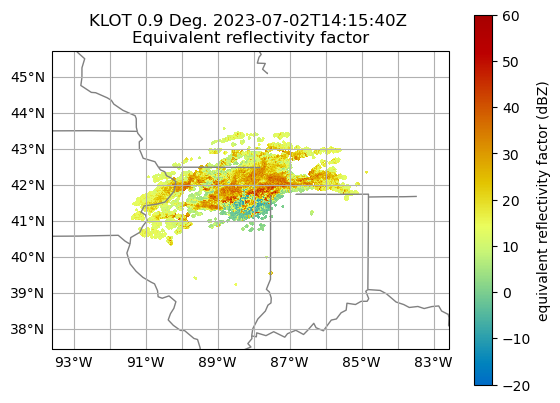

In [39]:
display = pyart.graph.RadarMapDisplay(radar) ## plotting reflectivity data
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     projection=ccrs.PlateCarree()
                    )

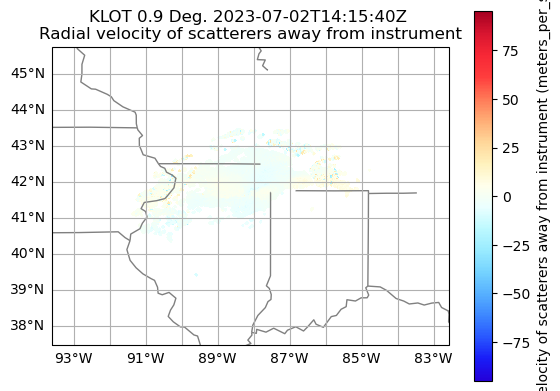

In [40]:
display.plot_ppi_map('velocity', ## plotting velocity data
                     sweep=3,
                     projection=ccrs.PlateCarree(),
                    )

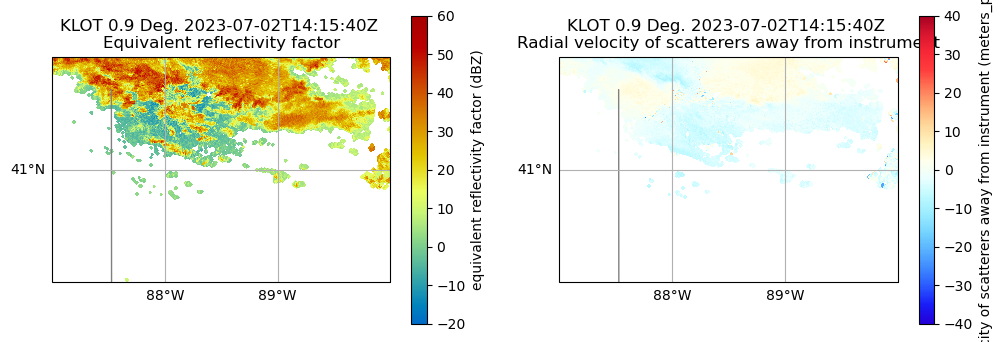

In [41]:
fig = plt.figure(figsize=[12, 4]) #plotting figures side by side, zoomed in near ATMOS site (Argonne National Laboratory) 

# first plot, reflectivity 
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     ax=ax1,)

# Zoom in near ATMOS
plt.xlim(-87, -90)
plt.ylim(40, 42)

# second plot, velocity
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
display.plot_ppi_map('velocity',
                     sweep=3,
                     vmin=-40,
                     vmax=40,
                     projection=ccrs.PlateCarree(),
                     ax=ax2,)

# Zooming in near ATMOS site
plt.xlim(-87, -90)
plt.ylim(40, 42)
plt.show()

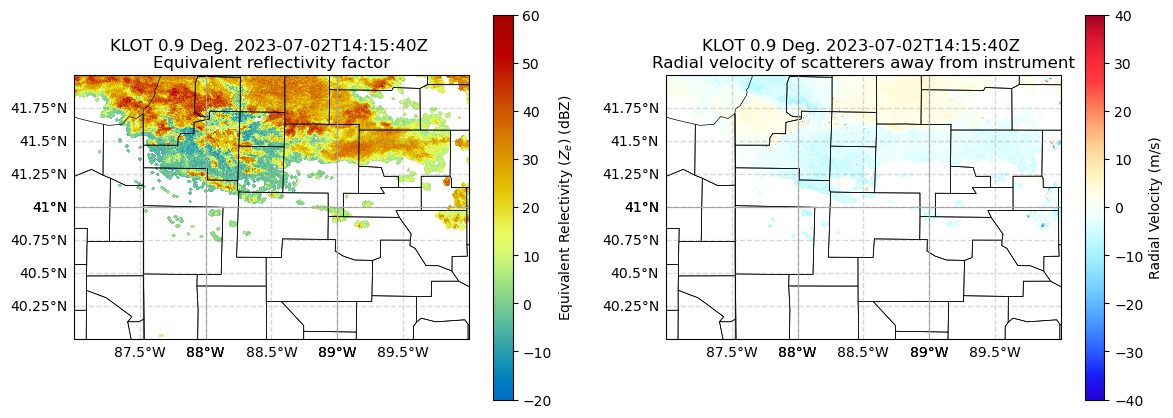

In [42]:
# subplots with additional gridlines and counties 
fig = plt.figure(figsize=[14, 5])

# Setup our first axis with reflectivity
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
ref_map = display.plot_ppi_map('reflectivity',
                               sweep=3,
                               vmin=-20,
                               vmax=60,
                               ax=ax1,
                               colorbar_label='Equivalent Relectivity ($Z_{e}$) (dBZ)')


# Zoom in by setting the xlim/ylim
plt.xlim(-87, -90)
plt.ylim(40, 42)
# Add gridlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=True,
                  linewidth=1, 
                  color='gray', 
                  alpha=0.3,
                  linestyle='--')

# Make sure labels are only plotted on the left and bottom
gl.xlabels_top = False
gl.ylabels_right = False

# Increase the fontsize of our gridline labels
gl.xlabel_style = {'fontsize':10}
gl.ylabel_style = {'fontsize':10}

# Add counties
ax1.add_feature(USCOUNTIES,
                linewidth=0.5)

# Setup our second axis for velocity
ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
vel_plot = display.plot_ppi_map('velocity',
                                sweep=3,
                                vmin=-40,
                                vmax=40,
                                projection=ccrs.PlateCarree(),
                                ax=ax2,
                                colorbar_label='Radial Velocity (m/s)')

# Zoom in by setting the xlim/ylim
plt.xlim(-87, -90)
plt.ylim(40, 42)
# Add gridlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(),
                   draw_labels=True,
                   linewidth=1, 
                   color='gray', 
                   alpha=0.3,
                   linestyle='--')

# Make sure labels are only plotted on the left and bottom
gl.xlabels_top = False
gl.ylabels_right = False

# Increase the fontsize of our gridline labels
gl.xlabel_style = {'fontsize':10}
gl.ylabel_style = {'fontsize':10}

# Add counties
ax2.add_feature(USCOUNTIES,
                linewidth=0.5)
plt.show()

## Focus on Radar Data Surrounding ATMOS Site.

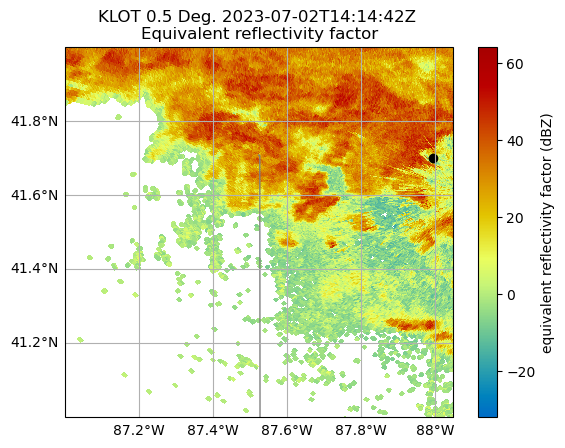

In [43]:
site_lon = -87.99512386322021  #ATMOS site coordinates
site_lat = 41.70178755070838 
display = pyart.graph.RadarMapDisplay(radar)
ax = plt.subplot(111, projection=ccrs.PlateCarree())
plt.xlim(-87, -88.05) #zooming in to see where column extraction will take place as well as looking near ATMOS
plt.ylim(41, 42)
display.plot_ppi_map(
    "reflectivity",
    0,
    ax=ax,
    vmin=-32,
    vmax=64.0,
    lon_lines=np.arange(-88, -87, 0.2),
    lat_lines=np.arange(41, 42, 0.2),
)
#Mark ATMOS location with black dot
ax.scatter(site_lon, site_lat, color="black")
plt.show()

## Data Extraction for Column Above ATMOS site. 

In [44]:
ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)
print (ds)

<xarray.Dataset>
Dimensions:                       (height: 17)
Coordinates:
  * height                        (height) float64 349.0 349.0 ... 4.791e+03
Data variables:
    velocity                      (height) float64 nan nan nan ... 5.0 7.0 3.0
    differential_reflectivity     (height) float64 2.094 nan ... 0.125 -0.4688
    differential_phase            (height) float64 11.99 nan ... 59.94 63.11
    spectrum_width                (height) float64 nan nan nan ... 0.5 0.5 1.0
    reflectivity                  (height) float32 4.0 4.0 -8.0 ... 13.0 3.0
    cross_correlation_ratio       (height) float64 0.4483 nan ... 0.9783 0.9617
    clutter_filter_power_removed  (height) float64 47.0 nan 38.0 ... nan nan nan
    base_time                     datetime64[ns] 2023-07-02T14:14:42
    time_offset                   (height) datetime64[ns] 2023-07-02T14:14:51...
Attributes:
    distance_from_radar:    13.124 km
    azimuth:                34.404 degrees
    latitude_of_location:   41.7017

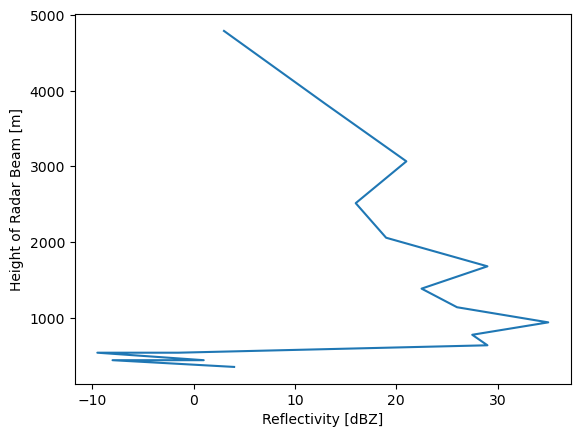

In [45]:
#reflectivity plot over site point (column above ATMOS)
ds.reflectivity.plot(y="height") 

## Summary 
### This notebook reads in files from the Chicago NWS Radar (KLOT) data, uses PY-art to plot specifically reflectivity fields with gridlines and counties and zooms into an area near the ATMOS site of Argonne National Laboratory. It focuses on 14 UTC on July 2nd, which a period of heaviest rainfall for the flood event. Used for final SULI project. 
### Also extracts an xarray dataset for a column directly above the ATMOS site. 
### Developed by Tehreem Qureshi, SULI intern for EVS.